In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from PIL import Image


In [2]:
# Importing images.
food = ['Burger', 'Donut', 'Hot Dog', 'Pizza', 'Sandwich']


batch_size = 128

kwargs = {
    'label_mode' : 'categorical',
    'labels' : 'inferred',
    'batch_size' : batch_size,
    'image_size' : (180, 180),
    'seed' : 10,
    'class_names' : food,
}
train = keras.utils.image_dataset_from_directory(
    './img/Training Data/',
    **kwargs
)

test = keras.utils.image_dataset_from_directory(
    './img/Validation Data/', 
    **kwargs
)

Found 7493 files belonging to 5 classes.
Found 2500 files belonging to 5 classes.


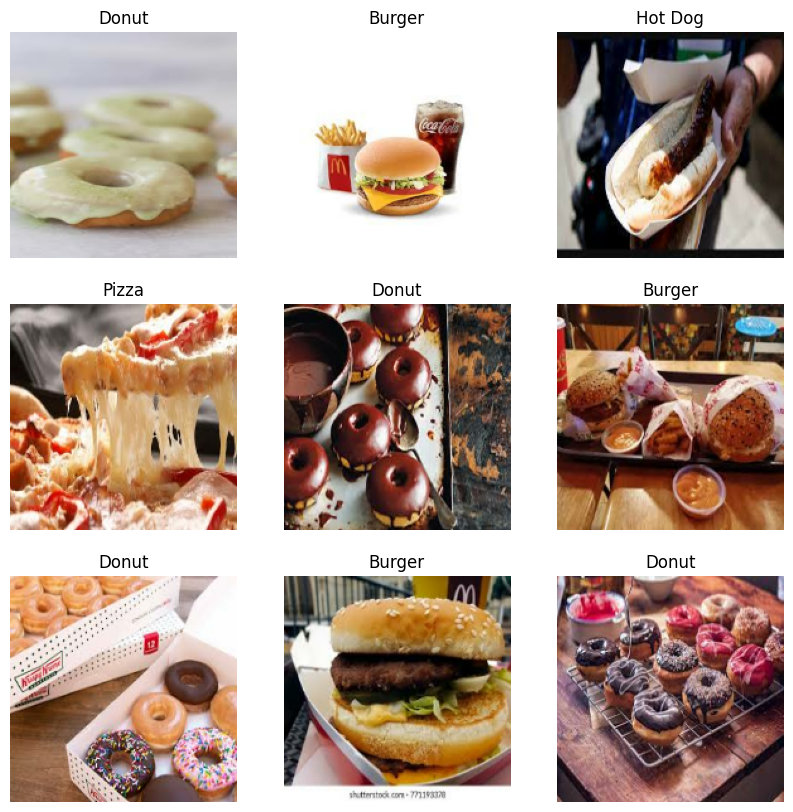

In [3]:
class_names = train.class_names

random_batch = np.random.choice(range(1, batch_size+1))

plt.figure(figsize=(10, 10))
for images, labels in train.take(random_batch):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

In [5]:
# Initial Neural Network.
output_shape = len(class_names)

ini_model = keras.models.Sequential([
    # Standarize data
    layers.Rescaling(1./255, input_shape=[180,180,3]),
    
    # Base
    layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3,3), padding='same'),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3,3), padding='same'),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(3,3), padding='same'),
    
    # Head.
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(output_shape, activation='softmax')
])

opt = keras.optimizers.Adam(learning_rate=1e-3)
loss = keras.losses.CategoricalCrossentropy()
ini_model.compile(
    optimizer=opt,
    loss=loss,
    metrics=['accuracy']
)

ini_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        1

Epoch 1/10
59/59 [==============================] - 10s 101ms/step - loss: 1.5478 - accuracy: 0.3130 - val_loss: 1.4135 - val_accuracy: 0.3808
Epoch 2/10
59/59 [==============================] - 4s 62ms/step - loss: 1.3348 - accuracy: 0.4355 - val_loss: 1.2622 - val_accuracy: 0.4880
Epoch 3/10
59/59 [==============================] - 4s 61ms/step - loss: 1.1797 - accuracy: 0.5189 - val_loss: 1.1898 - val_accuracy: 0.5332
Epoch 4/10
59/59 [==============================] - 4s 61ms/step - loss: 1.0627 - accuracy: 0.5815 - val_loss: 1.0612 - val_accuracy: 0.5916
Epoch 5/10
59/59 [==============================] - 4s 61ms/step - loss: 0.9667 - accuracy: 0.6261 - val_loss: 1.0054 - val_accuracy: 0.6116
Epoch 6/10
59/59 [==============================] - 4s 64ms/step - loss: 0.8967 - accuracy: 0.6598 - val_loss: 1.0030 - val_accuracy: 0.6184
Epoch 7/10
59/59 [==============================] - 4s 63ms/step - loss: 0.8389 - accuracy: 0.6826 - val_loss: 1.0603 - val_accuracy: 0.6040
Epoch 8/10


<AxesSubplot: >

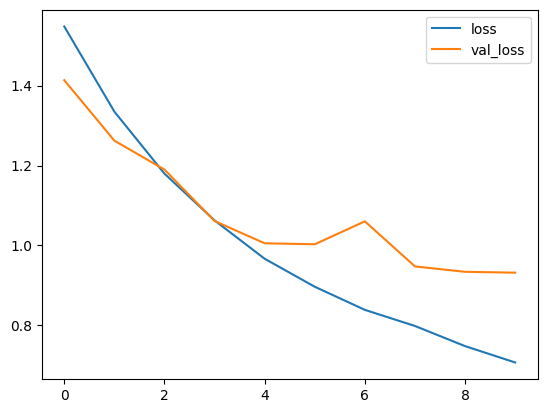

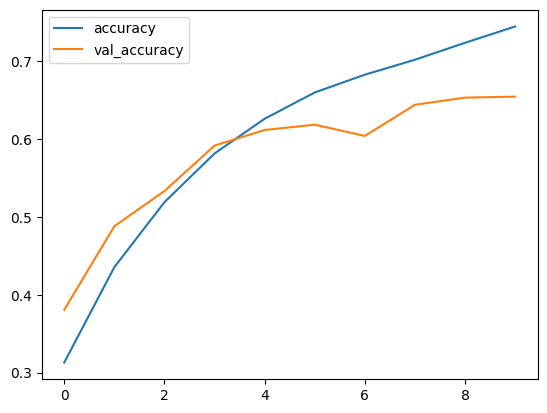

In [6]:
ini_history = ini_model.fit(
    train,
    validation_data=test,
    epochs=10
)

ini_history_df = pd.DataFrame(ini_history.history)
ini_history_df[['loss', 'val_loss']].plot()
ini_history_df[['accuracy', 'val_accuracy']].plot()